In [1]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
## Loading the dataset
df=pd.read_csv(r'/content/drive/MyDrive/audios/csv files/Temporalmean-features.csv')
df

,filename,emotion,intensity,modality,gender,actor_id,filepath,AE_mean,RMSE_mean,ZCR_mean
0,03-01-01-01-02-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.007719,0.002580,0.059296
1,03-01-01-01-01-02-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.007135,0.002282,0.067220
2,03-01-01-01-01-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.006430,0.002092,0.061312
3,03-01-01-01-02-02-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.007372,0.002385,0.072839
4,03-01-03-02-02-01-22.wav,Happy,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.039155,0.013946,0.086826
...,...,...,...,...,...,...,...,...,...,...
2447,03-02-06-02-02-01-02.wav,Fearful,Strong,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...,0.052375,0.020592,0.086145
2448,03-02-06-01-02-01-02.wav,Fearful,Normal,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...,0.032363,0.012334,0.075225
2449,03-02-06-01-02-02-02.wav,Fearful,Normal,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...,0.030873,0.012220,0.081032
2450,03-02-06-02-01-01-02.wav,Fearful,Strong,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...,0.050430,0.019506,0.078261


In [3]:
filepath=df['filepath'][2451]  ## Fearful

In [4]:
# load audio files with librosa
fearful1, sr = librosa.load(filepath)

In [5]:
## Audio Sample:
ipd.Audio(df['filepath'][2451])

In [6]:
len(fearful1)

98589

In [7]:
## Fourier Transform
X = np.fft.fft(fearful1)
X_mag = np.absolute(X)   ## Only taking real part and not complex
X_mag

array([0.27843255, 0.18747726, 0.15825346, ..., 0.17551912, 0.15825346,
       0.18747726], dtype=float32)

FFT tells about the different frequencies present in the signal but has no infrence about the exact time frame that signal has been produced, therefore we use STFT i.e., Short-Time Fourier Transform.**bold text**

In [8]:
## Function to visualize FFT
def plot_magnitude_spectrum(signal, sr, title, f_ratio=0.2):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)

    plt.figure(figsize=(18, 5))

    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)

    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

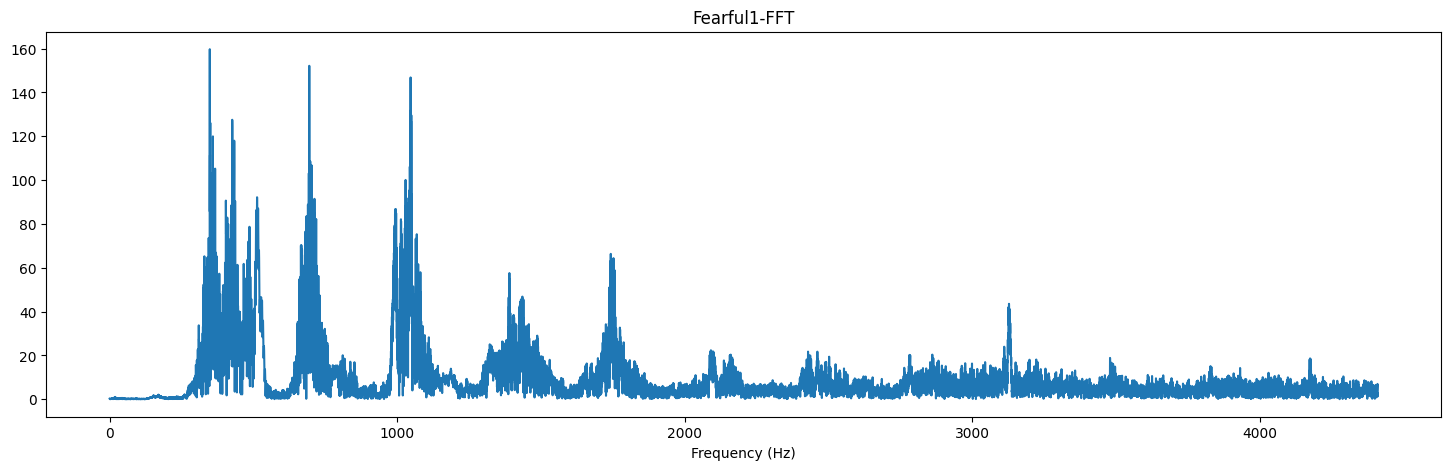

In [9]:
plot_magnitude_spectrum(fearful1, sr, "Fearful1-FFT", 0.2)

We can observe that the dominant frequencies are concentrated in the lower end of the spectrum, which is typical for speech (as it contains noise). The peaks in the graph indicate the frequencies with the highest energy.

In [10]:
# Drop duplicates by emotion (keep first occurrence in sorted order)
sample_df = df.drop_duplicates(subset="emotion", keep="first").reset_index(drop=True)

In [11]:
sample_df

,filename,emotion,intensity,modality,gender,actor_id,filepath,AE_mean,RMSE_mean,ZCR_mean
0,03-01-01-01-02-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.007719,0.002580,0.059296
1,03-01-03-02-02-01-22.wav,Happy,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.039155,0.013946,0.086826
2,03-01-06-01-01-02-22.wav,Fearful,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.019092,0.006825,0.074225
3,03-01-05-01-01-02-22.wav,Angry,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.013993,0.004921,0.067611
4,03-01-04-02-01-02-22.wav,Sad,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.012192,0.004235,0.073844
5,03-01-02-02-02-02-22.wav,Calm,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.005348,0.001646,0.081637
6,03-01-07-01-01-01-22.wav,Disgust,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.012947,0.004358,0.068977
7,03-01-08-02-01-01-22.wav,Surprised,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.022025,0.007865,0.076079


In [12]:
## loading with librosa.
Neutral_file=sample_df['filepath'][0]
Calm_file=sample_df['filepath'][5]
Happy_file=sample_df['filepath'][1]
Sad_file=sample_df['filepath'][4]
Angry_file=sample_df['filepath'][3]
Fearful_file=sample_df['filepath'][2]
Disgust_file=sample_df['filepath'][6]
Surprised_file=sample_df['filepath'][7]

# load audio files with librosa
neutral, sr = librosa.load(Neutral_file)
calm, _ = librosa.load(Calm_file)
happy, _ = librosa.load(Happy_file)
sad, _ = librosa.load(Sad_file)
angry, _ = librosa.load(Angry_file)
fearful, _ = librosa.load(Fearful_file)
disgust, _ = librosa.load(Disgust_file)
surprised, _ = librosa.load(Surprised_file)

# Visualizing all emotions after FFT.

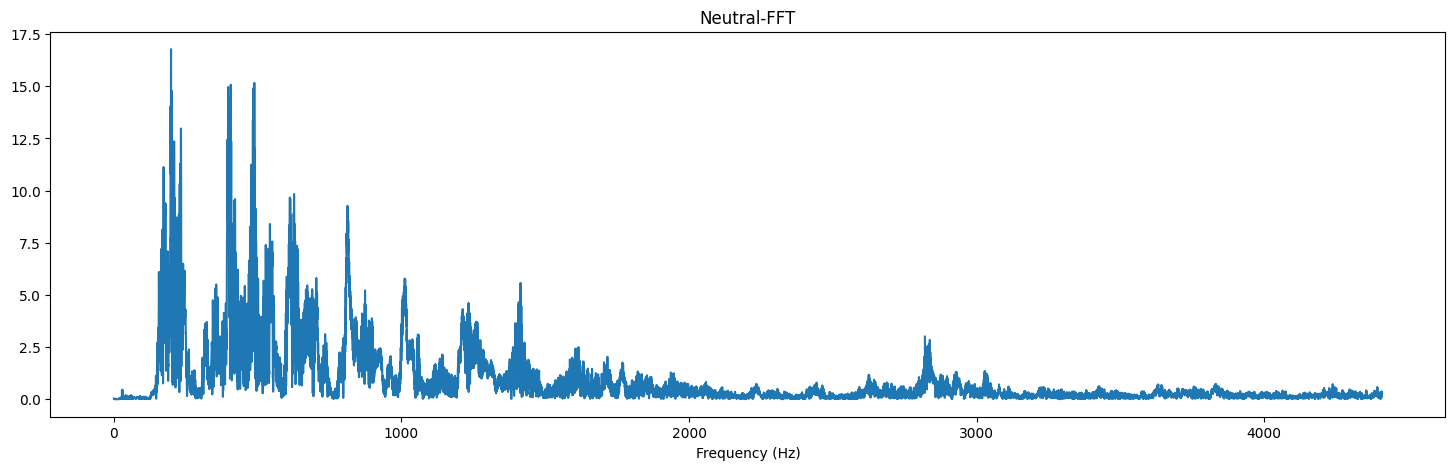

In [13]:
plot_magnitude_spectrum(neutral, sr, "Neutral-FFT", 0.2)

Neutral-FFT: Similar to the fearful sample you initially examined, the neutral speech also shows a concentration of energy in the lower frequencies. This is expected for typical speech.

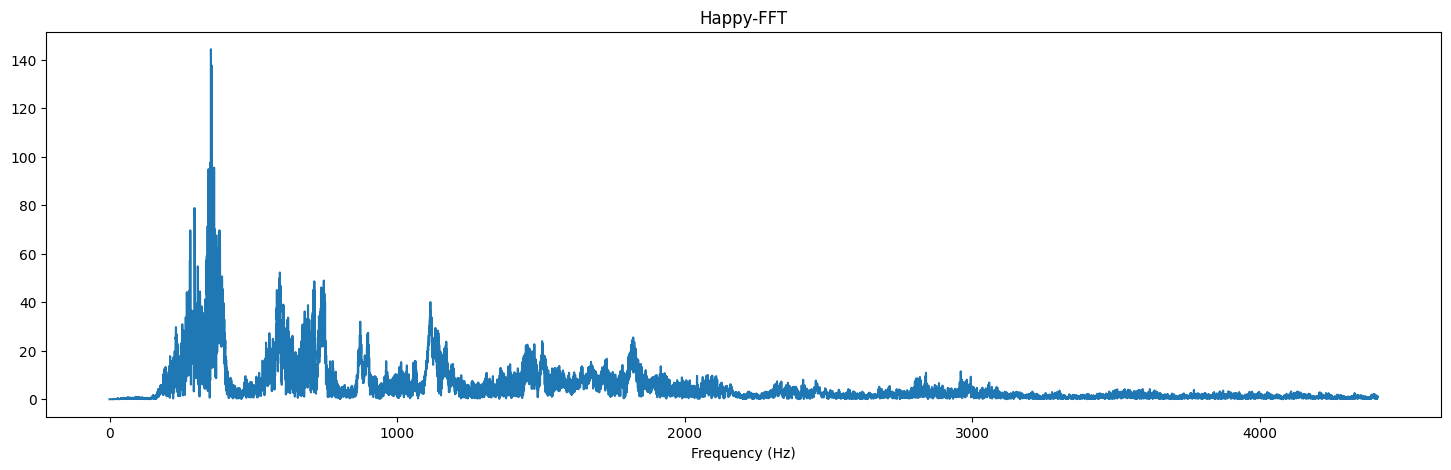

In [14]:
plot_magnitude_spectrum(happy, sr, "Happy-FFT", 0.2)

Happy-FFT: The happy speech plot might show some differences in the distribution of energy compared to neutral speech. Often, happy speech can have higher pitch and more variations in intonation, which might manifest as slightly different peaks or a wider spread of energy in the higher frequencies

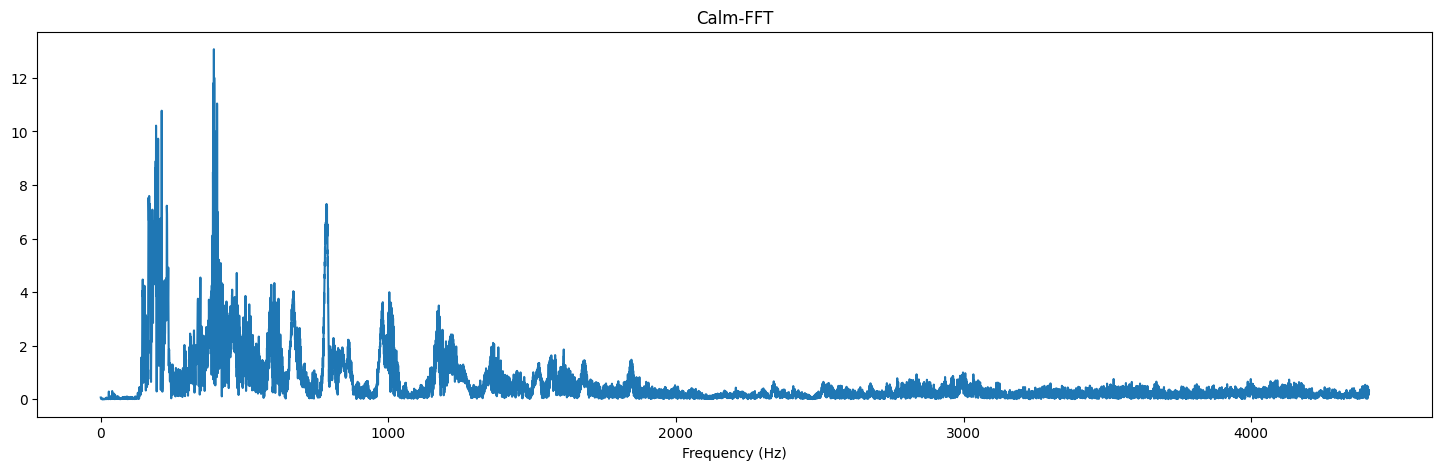

In [15]:
plot_magnitude_spectrum(calm, sr, "Calm-FFT", 0.2)

Calm-FFT: Calm speech might exhibit a more even distribution of energy in the lower frequencies and potentially less activity in the higher frequencies compared to more energetic emotions like happy or angry.

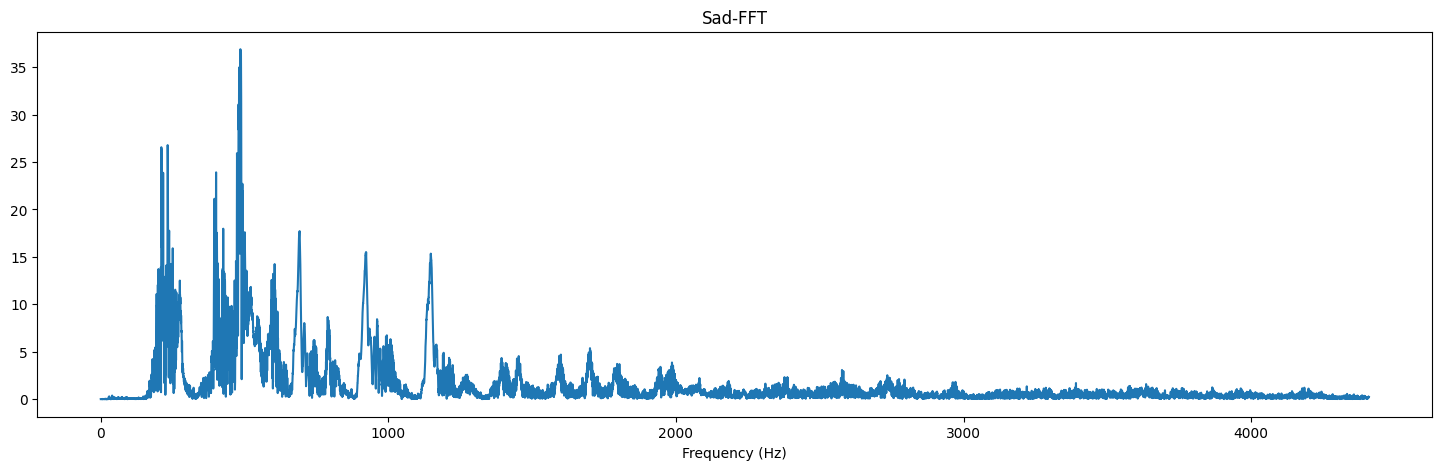

In [16]:
plot_magnitude_spectrum(sad, sr, "Sad-FFT", 0.2)

 Sad speech often has a lower pitch and less variation in intonation. This could be reflected in the magnitude spectrum as a stronger concentration of energy in the very low frequencies and less energy in the higher frequencies.

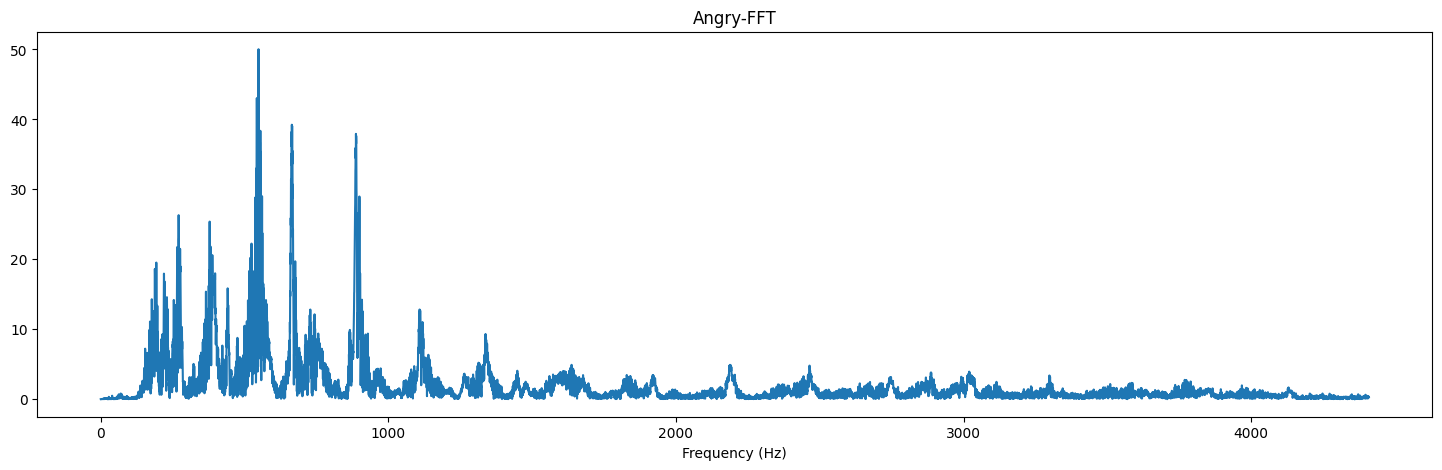

In [17]:
plot_magnitude_spectrum(angry, sr, "Angry-FFT", 0.2)

Angry-FFT: Angry speech is often characterized by higher intensity and more rapid changes in pitch. This might result in higher peaks in the magnitude spectrum and potentially more energy extending into the higher frequency ranges compared to neutral or calm speech.

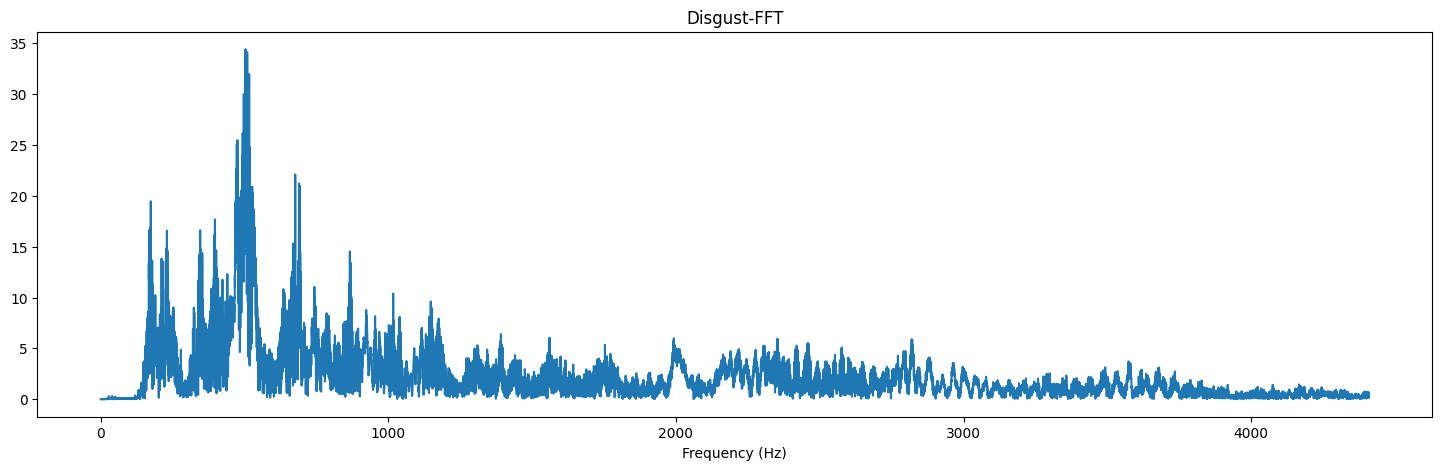

In [18]:
plot_magnitude_spectrum(disgust, sr, "Disgust-FFT", 0.2)

Disgust-FFT: Disgust speech can have unique spectral characteristics depending on how it's expressed. It might show specific peaks or patterns related to the sounds produced.

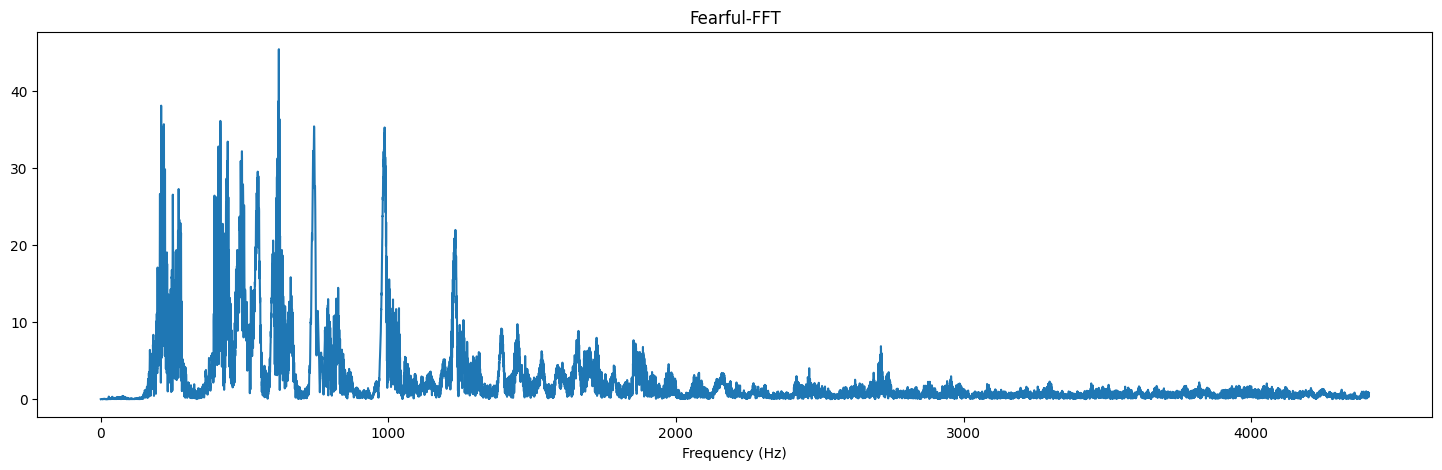

In [19]:
plot_magnitude_spectrum(fearful, sr, "Fearful-FFT", 0.2)

Fearful-FFT: As we discussed, fearful speech also tends to have energy concentrated in the lower frequencies, but the specific peaks and the overall shape of the spectrum might differ from other emotions.

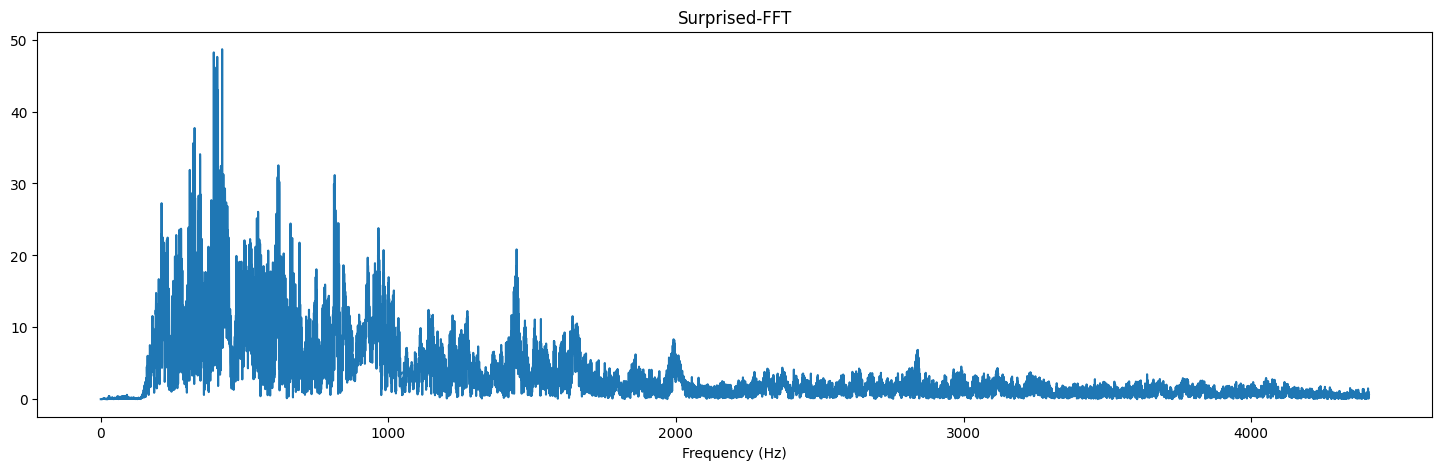

In [20]:
plot_magnitude_spectrum(surprised, sr, "Surprised-FFT", 0.2)

Surprised-FFT: Surprised speech can be characterized by sudden changes in pitch and intensity. The magnitude spectrum might show broader peaks or a different distribution of energy compared to more sustained emotions.

## **Extracting Short-Time Fourier Transform**

In [21]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [22]:
S_neutral = librosa.stft(neutral, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [23]:
S_neutral.shape

(1025, 156)

In [24]:
type(S_neutral[0][0])   ## Compried of complex number array.

numpy.complex64

# **Calculating the Spectrogram**

In [25]:
Y_neutral = np.abs(S_neutral) ** 2

In [26]:
Y_neutral  ## Its now the array of real numbers.

array([[3.1515578e-06, 2.2071076e-06, 1.9210800e-07, ..., 3.5962503e-07,
        1.0774647e-06, 8.4528801e-07],
       [3.1732029e-06, 9.3769245e-07, 2.7427905e-07, ..., 7.2934739e-07,
        5.5362507e-06, 7.2527810e-06],
       [3.0950014e-06, 2.5213924e-06, 1.2510041e-06, ..., 6.1941756e-07,
        1.6394184e-05, 2.2727283e-05],
       ...,
       [7.3856292e-15, 1.8338344e-15, 5.5314674e-19, ..., 3.0316482e-18,
        6.5134421e-13, 4.9469218e-12],
       [7.4960806e-15, 1.8364227e-15, 2.5700155e-19, ..., 1.9484372e-18,
        6.5040063e-13, 4.9308522e-12],
       [7.5171481e-15, 1.8180948e-15, 4.3226527e-20, ..., 1.9224186e-18,
        6.5028316e-13, 4.9277002e-12]], dtype=float32)

In [27]:
type(Y_neutral[0][0])

numpy.float32

# **Visualizing the Spectrogram**

In [28]:
## Funtion to plot the spectrogram.
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

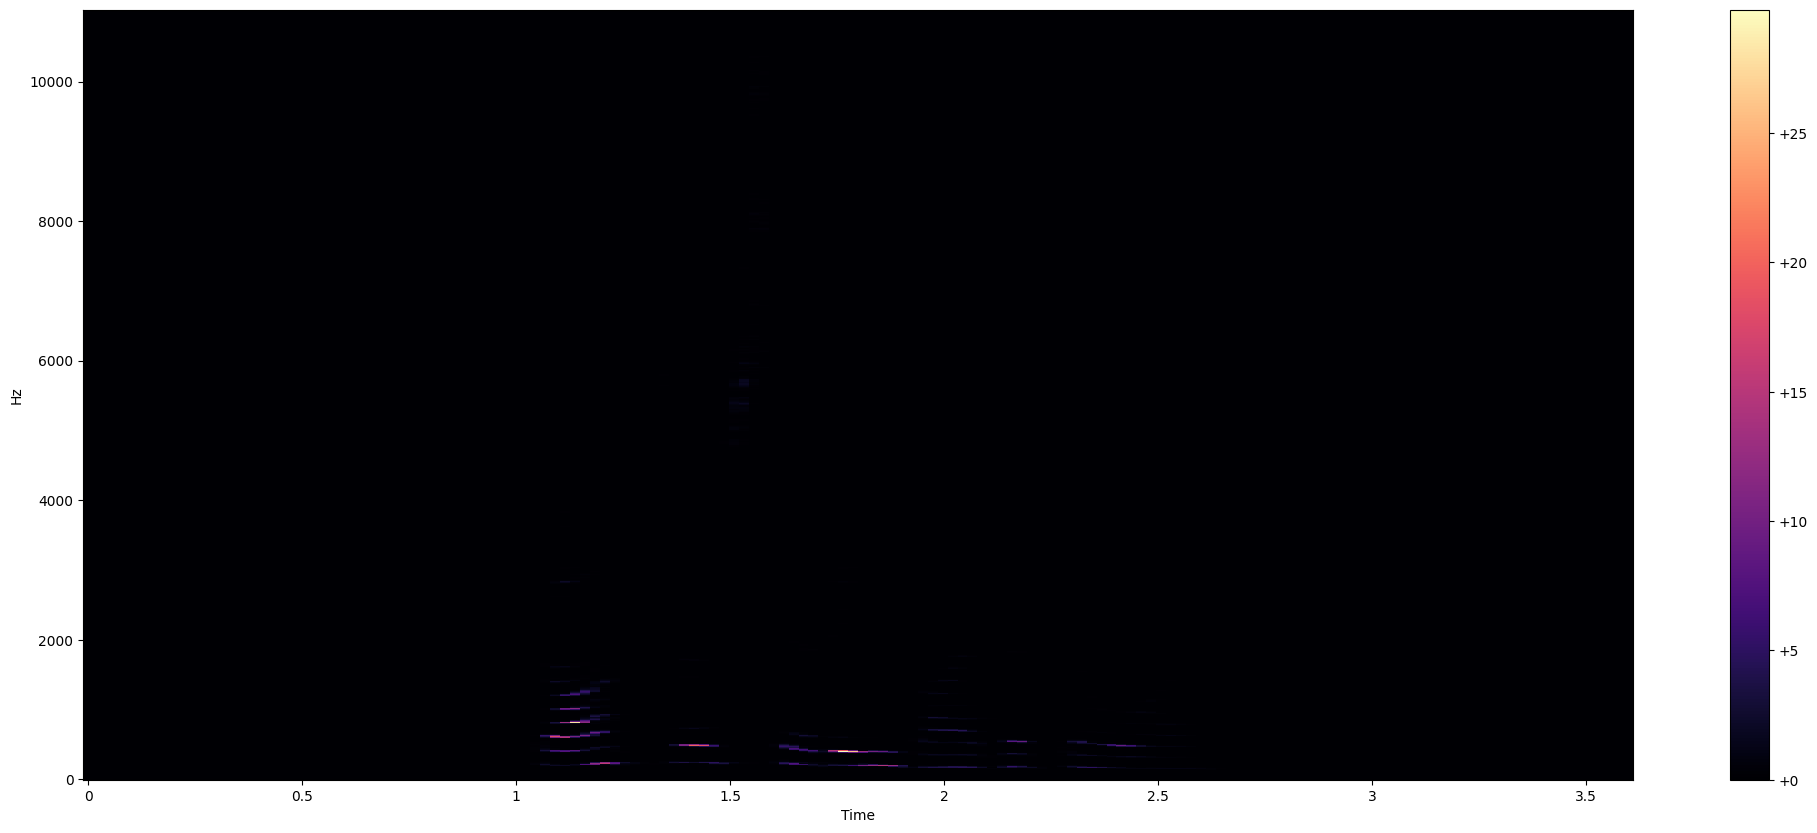

In [29]:
plot_spectrogram(Y_neutral, sr, HOP_SIZE)  ## Linear scale has been used.



*   X-axis (Time): The horizontal axis represents time.
*  Y-axis (Frequency): The vertical axis represents frequency.


*  Brighter or more intense colors indicate higher energy.



# **Log-Amplitude Spectrogram**


*   Enhances quieter details: By using a logarithmic scale, it makes it easier to see and analyze the less intense frequency components that might be less visible in a linear spectrogram.



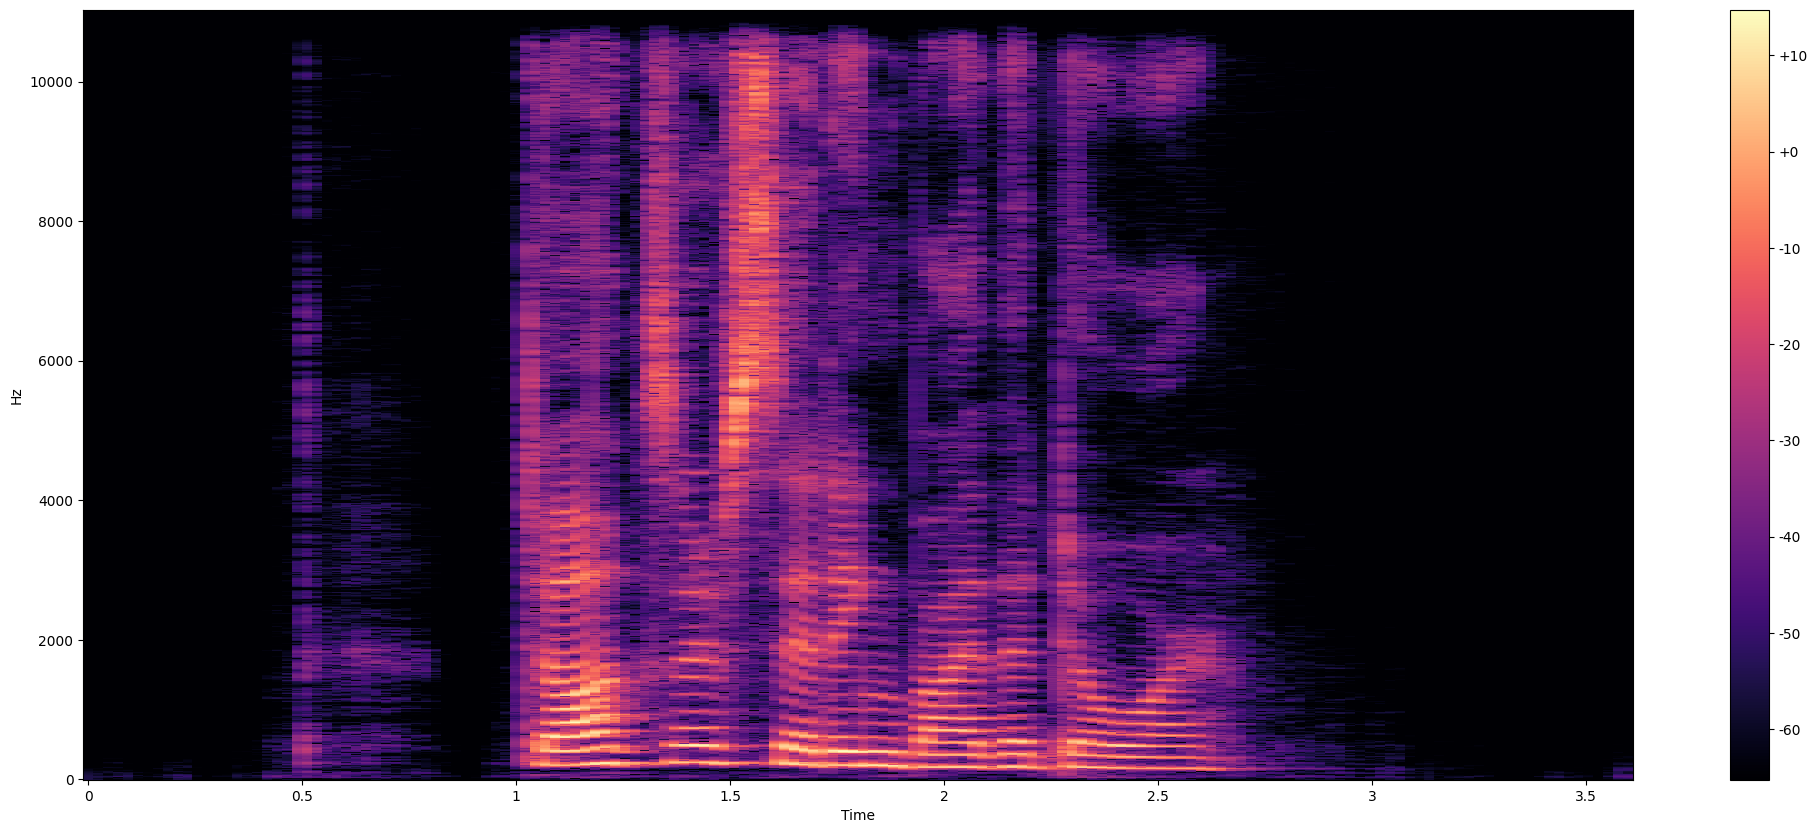

In [30]:
Y_log_neutral = librosa.power_to_db(Y_neutral)
plot_spectrogram(Y_log_neutral, sr, HOP_SIZE)

# **Log-Frequency Spectrogram**

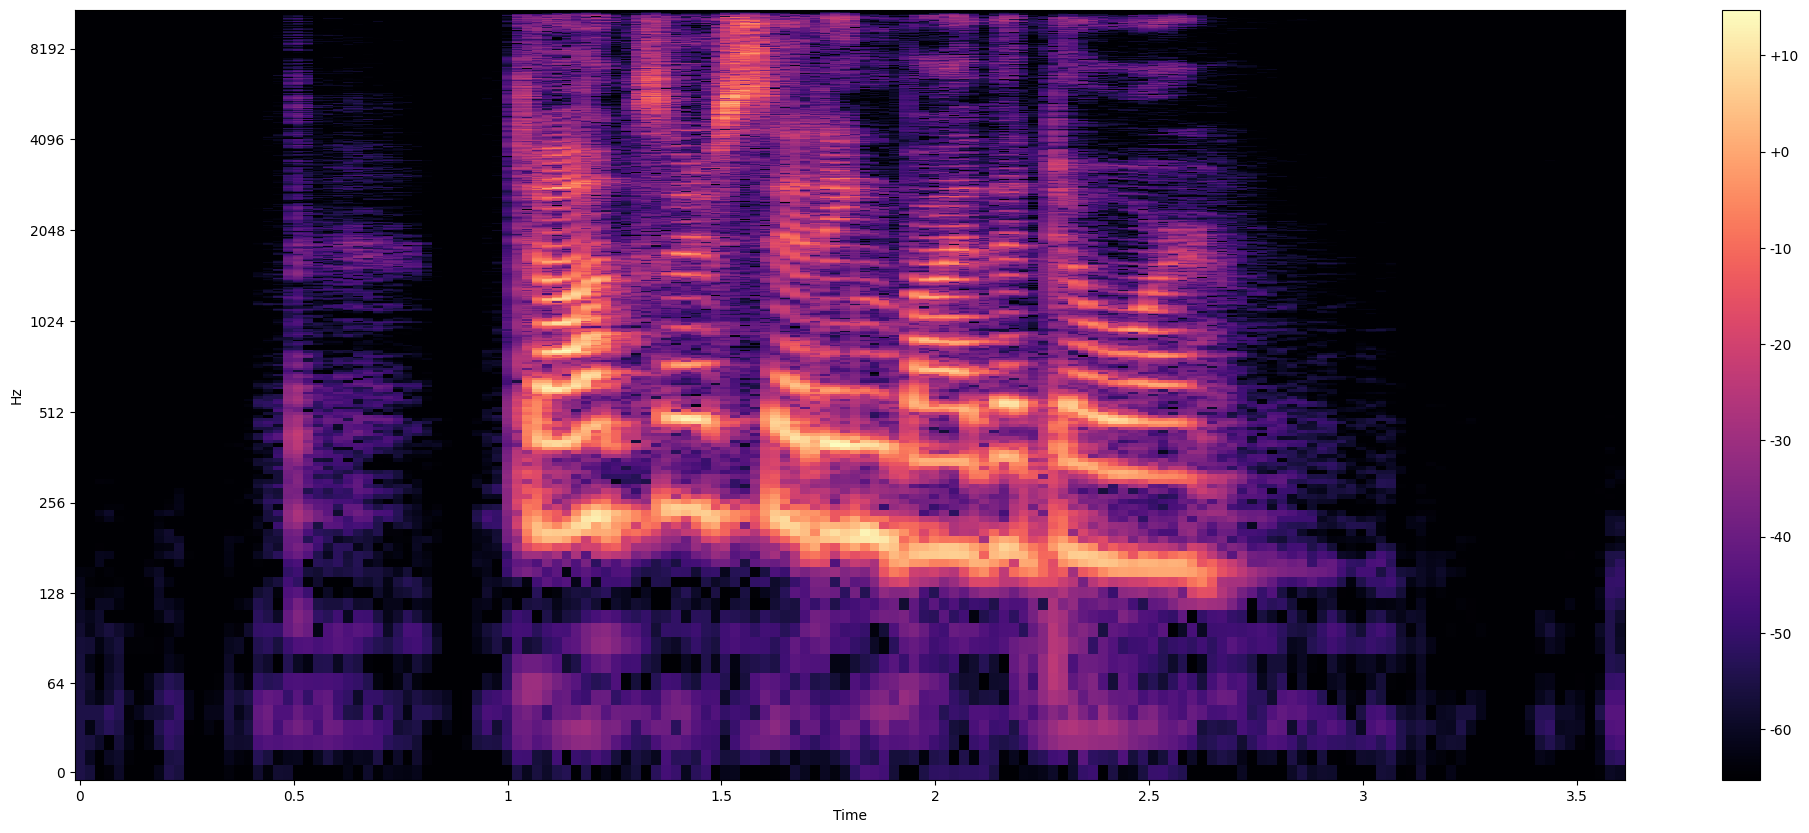

In [31]:
plot_spectrogram(Y_log_neutral, sr, HOP_SIZE, y_axis="log")

## **Visualising different emotions**

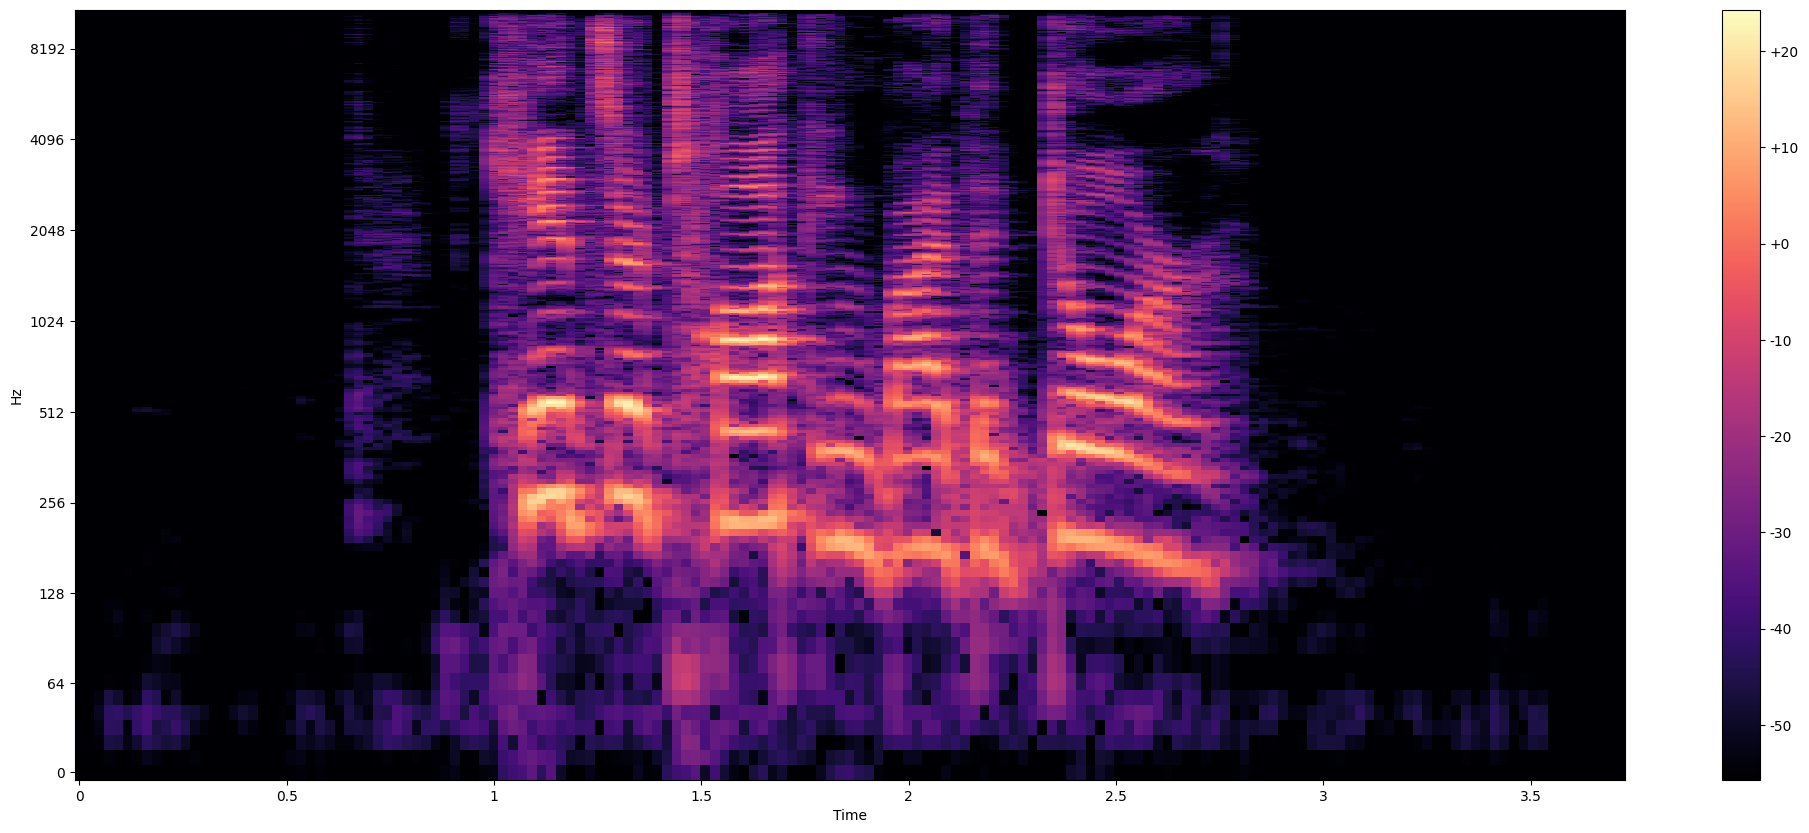

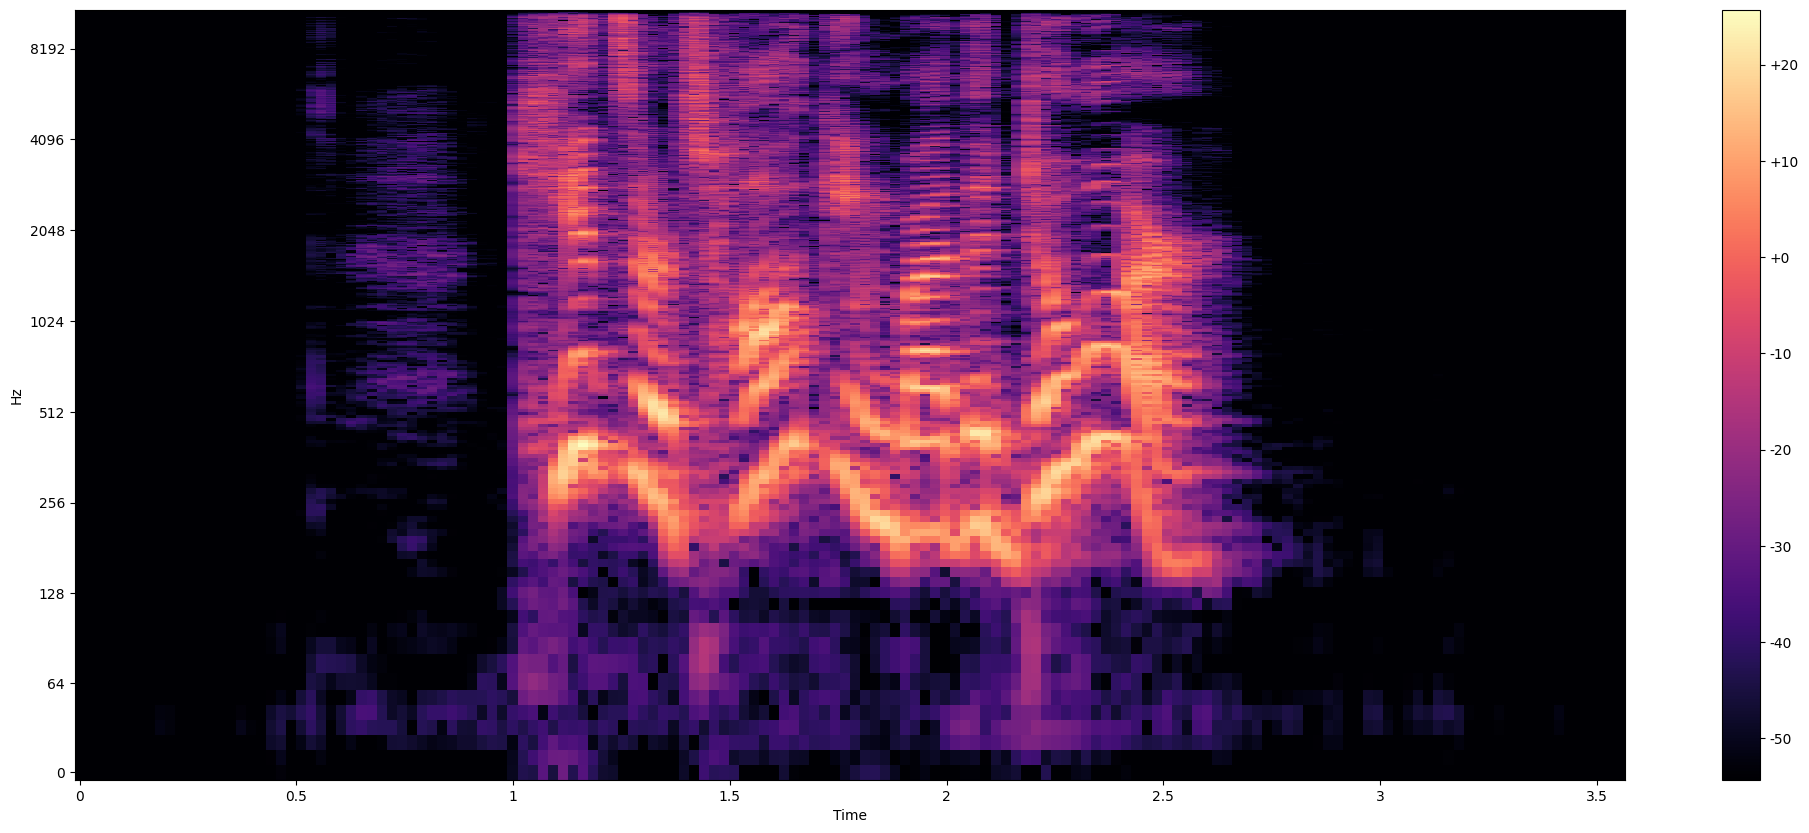

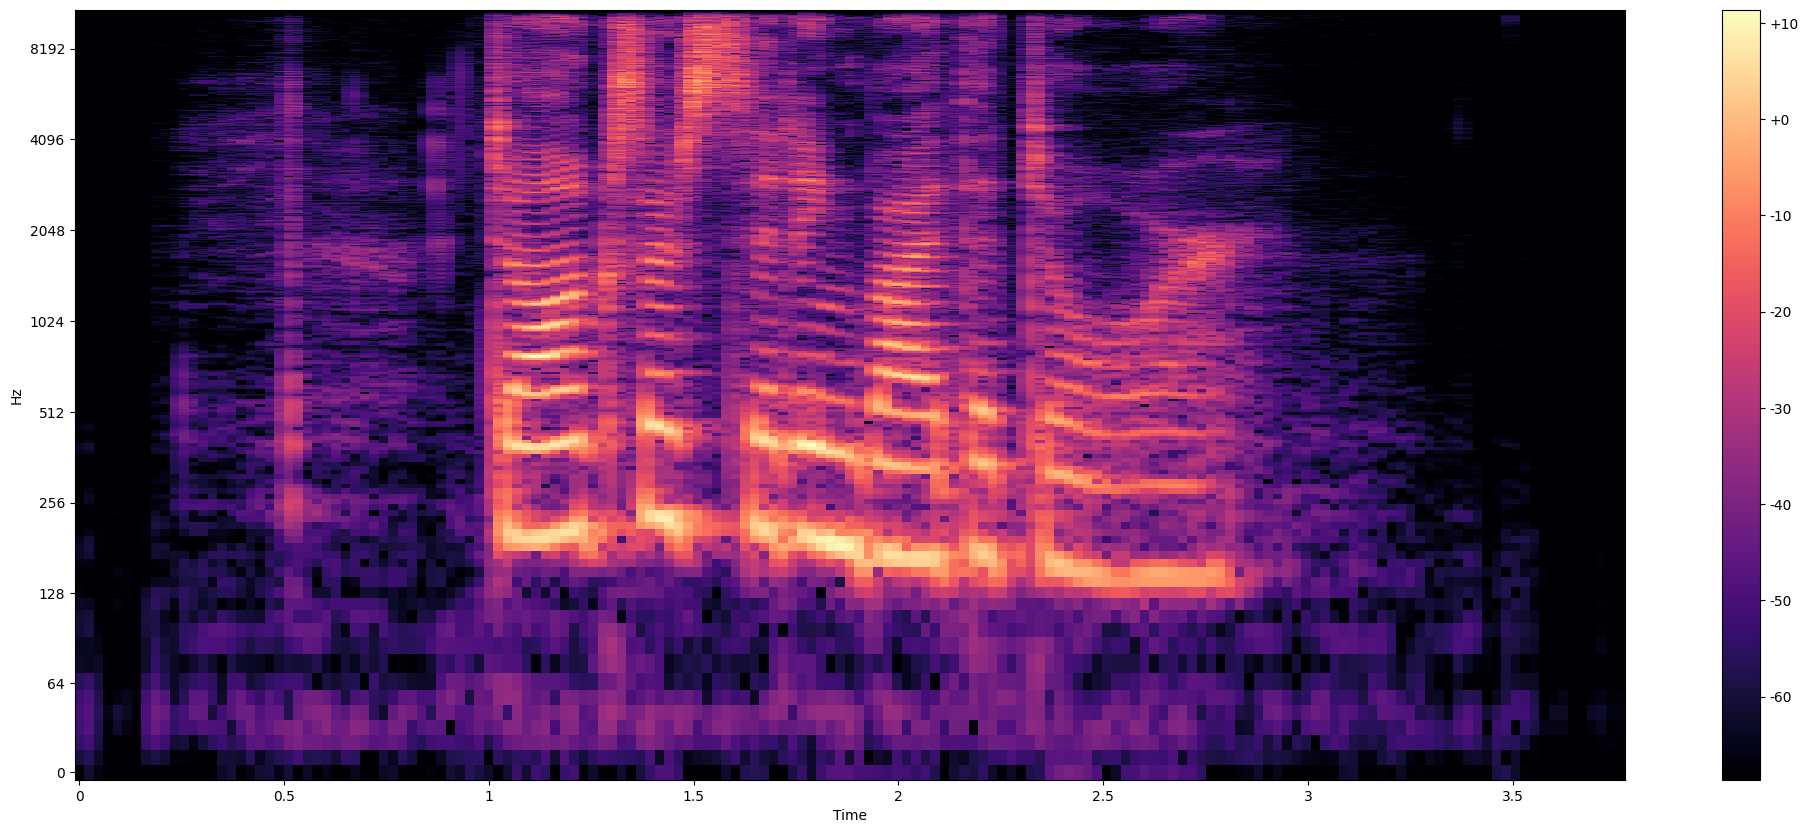

In [32]:
S_angry = librosa.stft(angry, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_surprised = librosa.stft(surprised, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_calm = librosa.stft(calm, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)


Y_angry = librosa.power_to_db(np.abs(S_angry) ** 2)
Y_surprised = librosa.power_to_db(np.abs(S_surprised) ** 2)
Y_calm = librosa.power_to_db(np.abs(S_calm) ** 2)



plot_spectrogram(Y_angry, sr, HOP_SIZE, y_axis="log")

plot_spectrogram(Y_surprised, sr, HOP_SIZE, y_axis="log")

plot_spectrogram(Y_calm, sr, HOP_SIZE, y_axis="log")

In [33]:
Y_calm

array([[-68.63337 , -61.35719 , -66.36726 , ..., -68.63337 , -68.63337 ,
        -68.63337 ],
       [-59.371395, -56.52552 , -62.462105, ..., -68.63337 , -68.63337 ,
        -68.63337 ],
       [-53.70091 , -51.35183 , -59.035873, ..., -67.303345, -66.75133 ,
        -68.63337 ],
       ...,
       [-68.63337 , -68.63337 , -68.63337 , ..., -68.63337 , -68.63337 ,
        -68.63337 ],
       [-68.63337 , -68.63337 , -68.63337 , ..., -68.63337 , -68.63337 ,
        -68.63337 ],
       [-68.63337 , -68.63337 , -68.63337 , ..., -68.63337 , -68.63337 ,
        -68.63337 ]], dtype=float32)

In [34]:
Y_angry.shape

(1025, 161)

In [35]:
Y_surprised.shape

(1025, 154)

## **Fetching STFT-Spectrogram arrays for all data samples.**

In [ ]:
# ---------- Constants ----------
FRAME_SIZE = 1024
HOP_LENGTH = 512


# ---------- STFT Spectrogram Function ----------
def stft_spectrogram(signal, frame_size, hop_length):
    stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop_length)
    spectrogram = librosa.power_to_db(np.abs(stft) ** 2)
    return spectrogram

# ---------- Process Each Row ----------
stft_spec_list = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    filepath = row['filepath']

    try:
        signal, sr = librosa.load(filepath, sr=None)
        stft_spec = stft_spectrogram(signal, FRAME_SIZE, HOP_LENGTH)
        stft_spec_list.append(stft_spec)
    except Exception as e:
        print(f" Error processing {filepath}: {e}")
        stft_spec_list.append(np.nan)

# ---------- Append STFT Spectrogram Column ----------
df["STFT-Spec"] = stft_spec_list

In [ ]:
# ---------- Constants ----------
FRAME_SIZE = 1024
HOP_LENGTH = 512

# ---------- STFT Spectrogram Function ----------
def stft_spectrogram(signal, frame_size, hop_length):
    stft = librosa.stft(signal, n_fft=frame_size, hop_length=hop_length)
    spectrogram = librosa.power_to_db(np.abs(stft) ** 2)
    return spectrogram

# ---------- Process Each Row ----------
stft_mean_list = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    filepath = row['filepath']

    try:
        signal, sr = librosa.load(filepath, sr=None)
        stft_spec = stft_spectrogram(signal, FRAME_SIZE, HOP_LENGTH)

        stft_mean = np.mean(stft_spec)  # Compute mean of 2D spectrogram
        stft_mean_list.append(stft_mean)

        if not np.isnan(stft_mean):
            print(f"✅ STFT mean correctly appended for: {filepath}")
        else:
            print(f" Warning: STFT mean is NaN for {filepath}")

    except Exception as e:
        print(f" Error processing {filepath}: {e}")
        stft_mean_list.append(np.nan)

# ---------- Append STFT Mean Column ----------
df["STFT_Mean"] = stft_mean_list

# ---------- Save the updated dataset ----------
df.to_csv("STFTmean-features.csv", index=False)


In [ ]:
df

In [ ]:
# Apply to relevant columns
for col in ['AE', 'ZCR', 'RMSE']:
    df[col] = df[col].apply(lambda x: np.fromstring(x.strip('[]'), sep=' ') if isinstance(x, str) else x)

In [ ]:
print(type(df['AE'][0]), df['AE'][0].shape)
print(type(df['ZCR'][0]), df['ZCR'][0].shape)
print(type(df['RMSE'][0]), df['RMSE'][0].shape)

In [ ]:
# ---------- Save Updated DataFrame ----------
# df.to_csv("data_with_stft.csv", index=False)

## **Mel filter banks**

In [36]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [37]:
filter_banks.shape

(10, 1025)

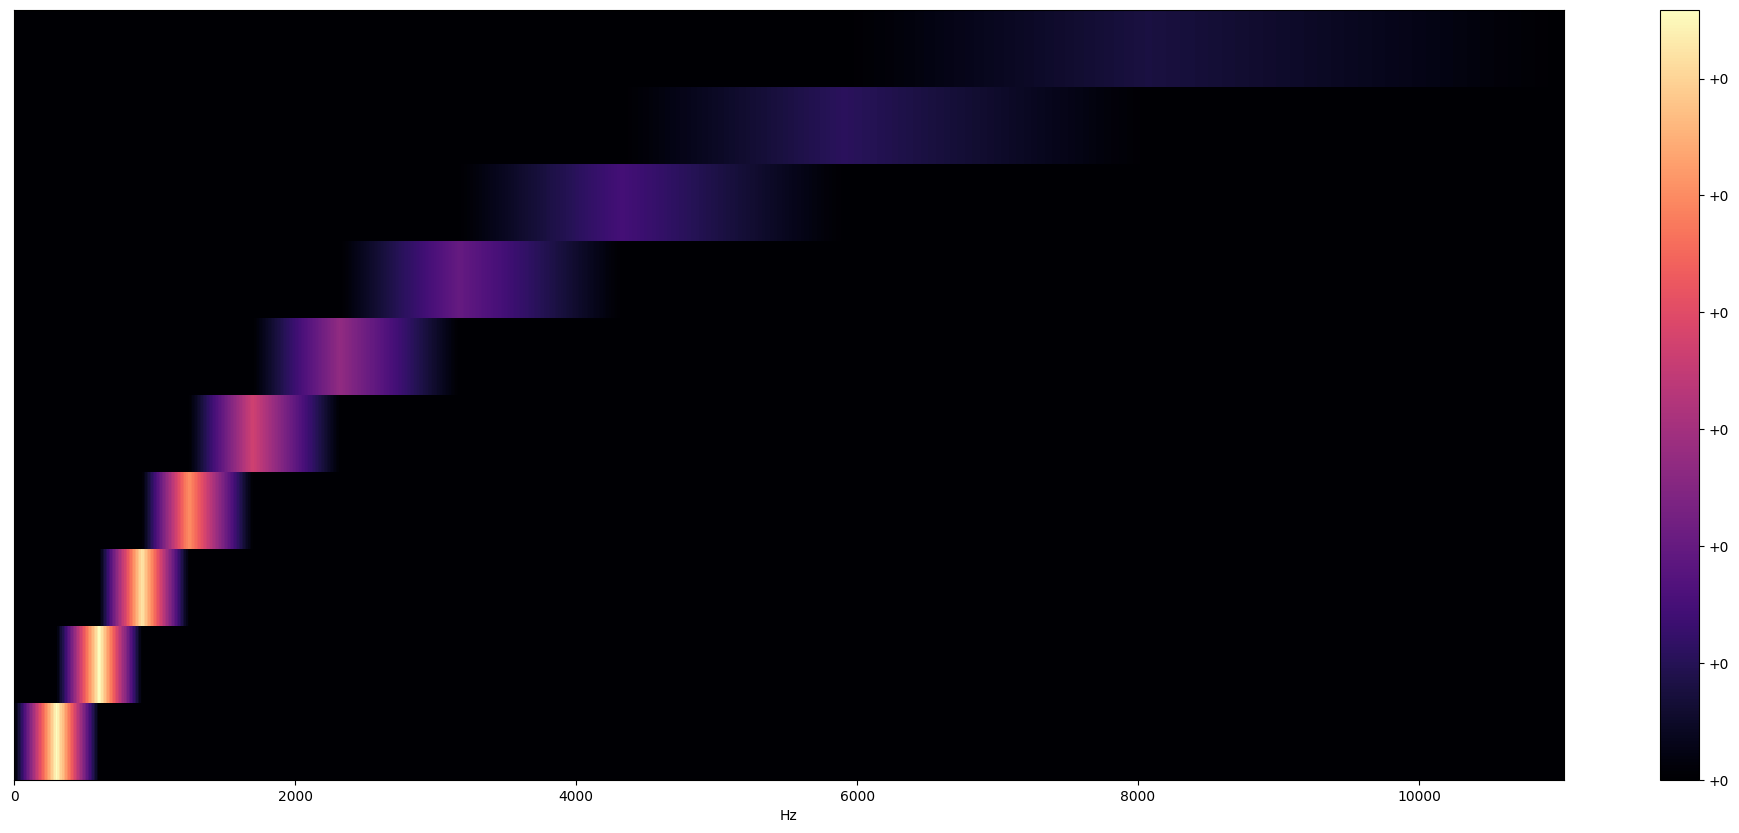

In [38]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

## **Extracting Mel Spectrogram**

In [39]:
mel_spectrogram = librosa.feature.melspectrogram(y=angry, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

In [40]:
mel_spectrogram.shape

(10, 161)

In [41]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [42]:
log_mel_spectrogram.shape

(10, 161)

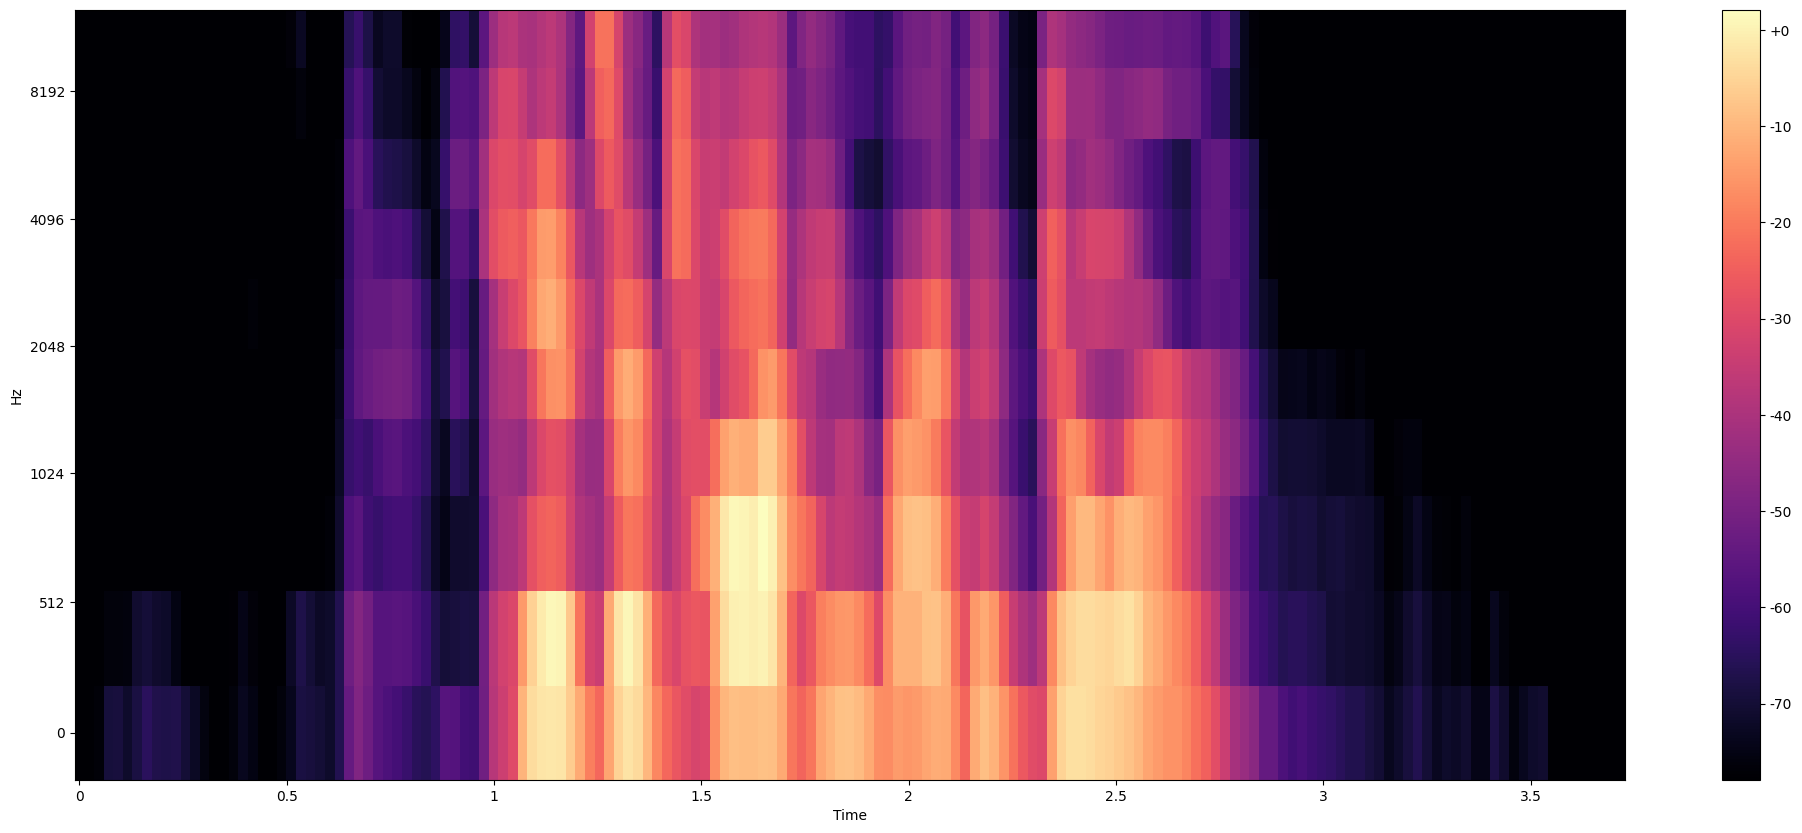

In [43]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show() ## For "Angry" emotion.

This is frequency vs time in terms MEL Scale.

## Computing MEL-Spectrogram for all samples

In [ ]:
# ---------- Function to Compute 128 Mel Spectrogram Bands ----------
def compute_mel_spectrogram_vector(file_path, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    try:
        y, sr = librosa.load(file_path, sr=sr)
        mel_spectrogram = librosa.feature.melspectrogram(
            y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
        )
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
        mel_means = np.mean(log_mel_spectrogram, axis=1)  # shape: (128,)

        if mel_means.shape[0] != 128 or np.any(np.isnan(mel_means)):
            print(f" Warning: Unexpected shape or NaN for {file_path}")
            return [np.nan] * 128
        else:
            print(f" Extracted 128-d Mel vector for: {file_path}")
            return mel_means

    except Exception as e:
        print(f" Error processing {file_path}: {e}")
        return [np.nan] * 128


In [ ]:
from tqdm import tqdm
tqdm.pandas()

mel_spec_cols = [f"Mel_{i}" for i in range(128)]
mel_specs_df = df['filepath'].progress_apply(lambda x: pd.Series(compute_mel_spectrogram_vector(x), index=mel_spec_cols))

# Merge with original DataFrame
df = pd.concat([df, mel_specs_df], axis=1)

# Optional: Save
df.to_csv("MelSpec-128bands.csv", index=False)


In [ ]:
df

In [ ]:
# ---------- Save Updated DataFrame ----------
# df.to_csv("data_with_MEL-Spec.csv", index=False)

## **Extracting MFCCs**

In [45]:
mfccs = librosa.feature.mfcc(y=disgust, n_mfcc=13, sr=sr)

In [46]:
mfccs.shape

(13, 160)

## **Visualising MFCCs**

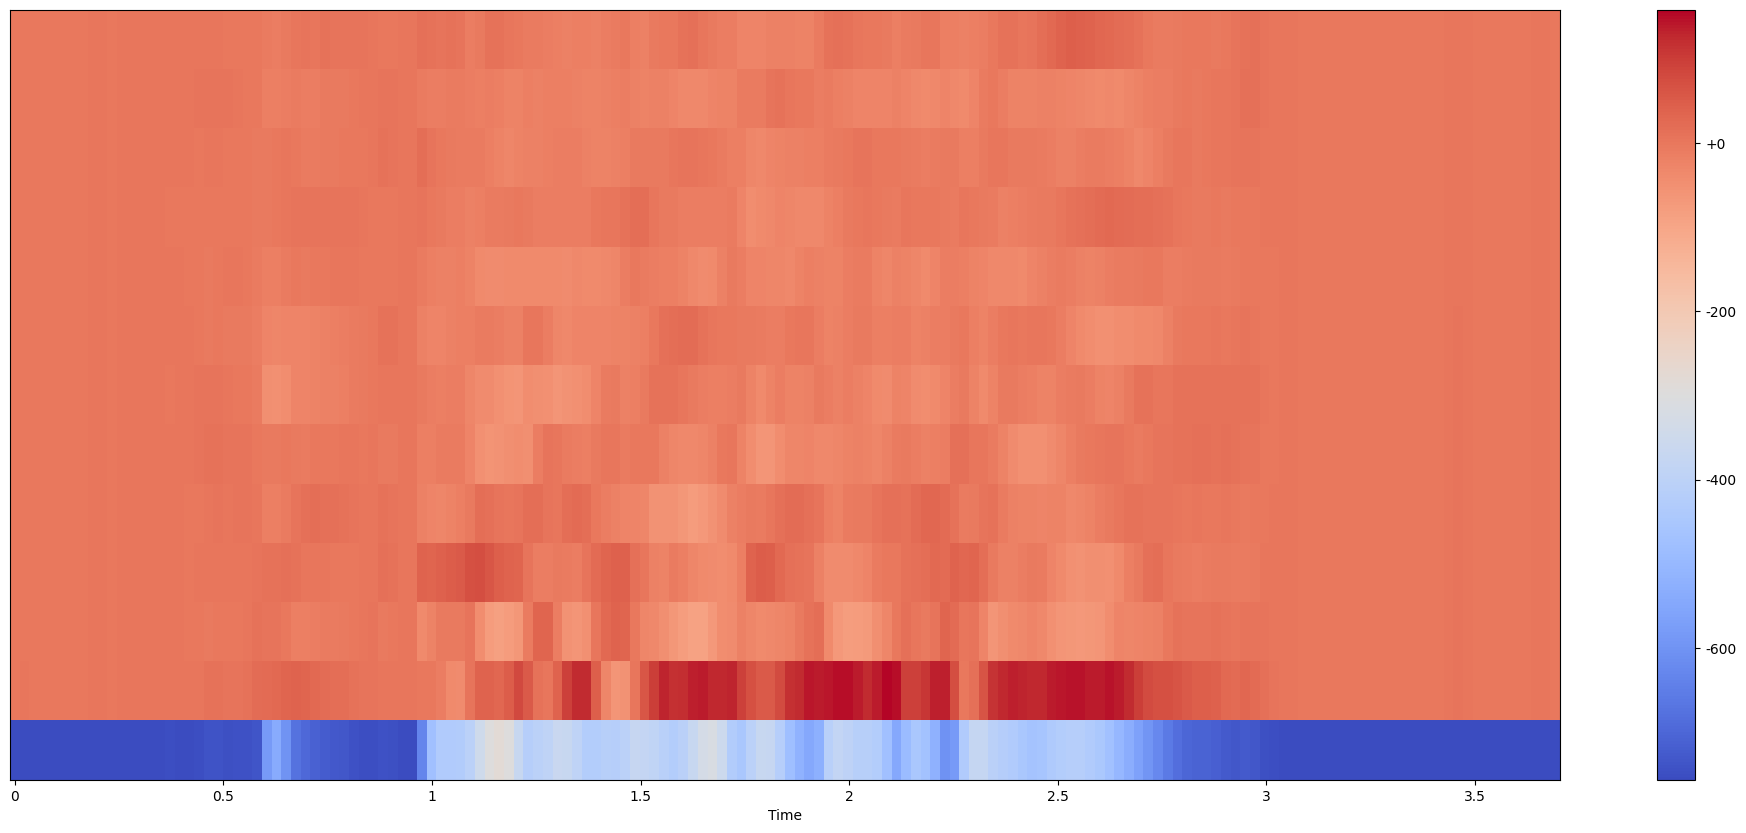

In [47]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

##**Computing first / second MFCCs derivatives**

In [48]:
delta_mfccs = librosa.feature.delta(mfccs)

In [49]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [50]:
delta_mfccs.shape

(13, 160)

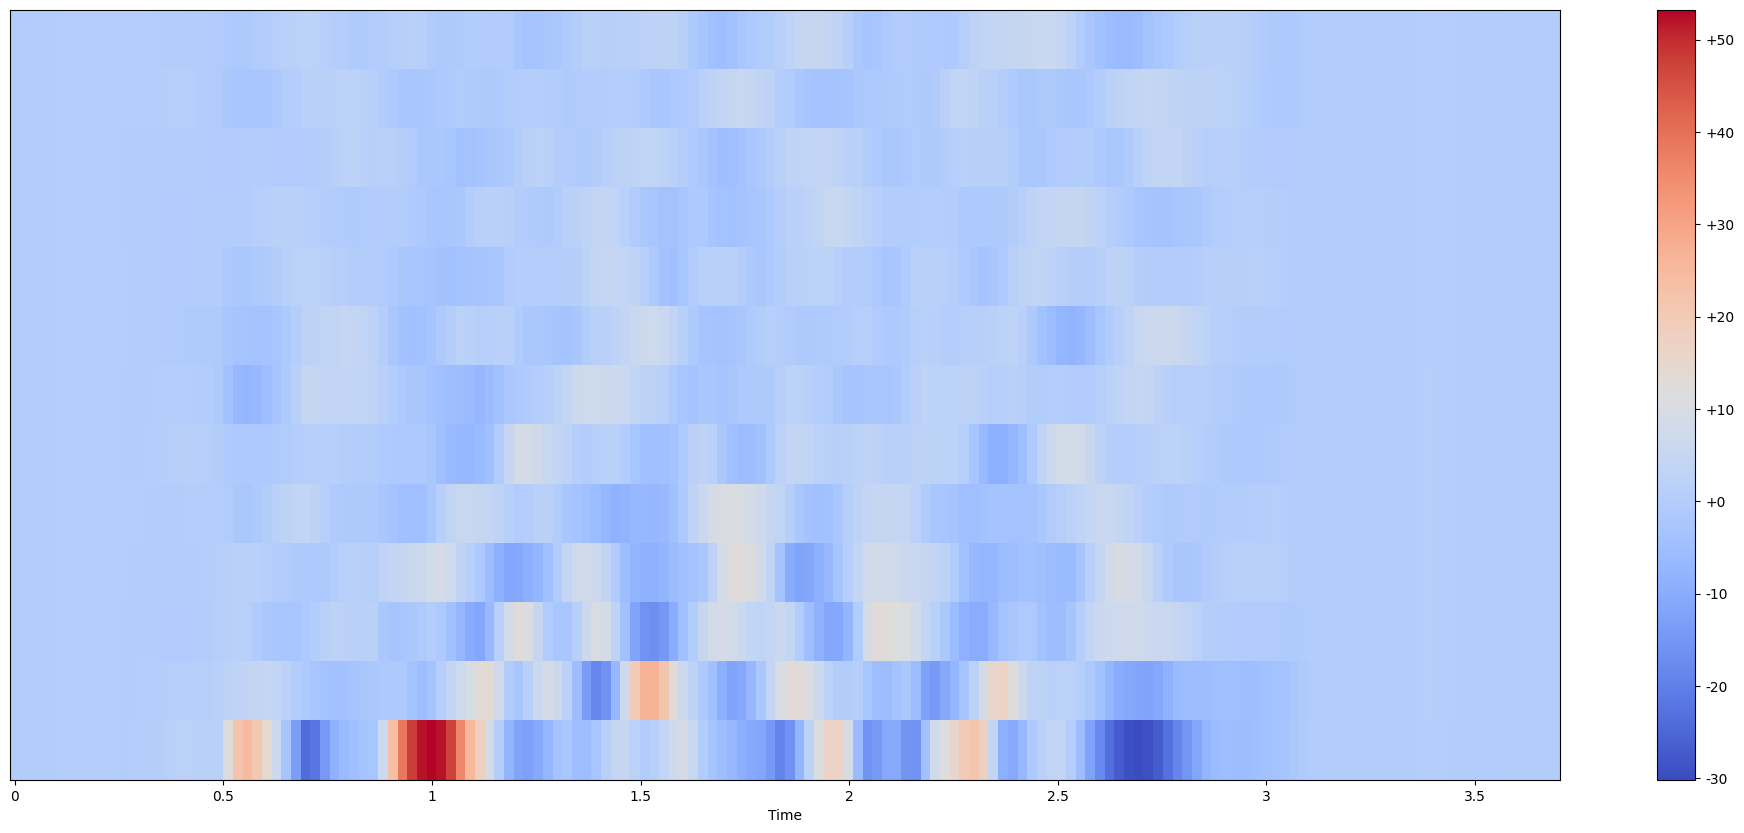

In [51]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

**MFCCs (Mel-Frequency Cepstral Coefficients)** capture spectral shape, which is good for identifying timbre or phonetic content. However, emotions and speaker characteristics also depend on temporal dynamics—how the speech signal evolves over time.



*   Delta MFCCs (1st-order) capture the rate of change of MFCCs (i.e., velocity).


*  Delta-Delta MFCCs (2nd-order) capture the acceleration of changes.


*   Captures prosody, intonation, and transitions, which are critical in expressive speech.






## **Computing MFCCs for all samples**

In [52]:
def extract_mfcc_means(file_path, n_mfcc=40):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Take mean over time axis (axis=1), result shape: (n_mfcc,)
        mfcc_mean = np.mean(mfcc, axis=1)

        if not np.isnan(mfcc_mean).any():
            print(f" MFCC means extracted for: {file_path}")
        else:
            print(f" Warning: NaN values found in MFCCs for: {file_path}")

        return mfcc_mean

    except Exception as e:
        print(f" Error processing {file_path}: {e}")
        return np.full(n_mfcc, np.nan)


In [ ]:
tqdm.pandas()

mfcc_features = df['filepath'].progress_apply(lambda x: extract_mfcc_means(x))

# Convert the resulting Series of arrays into a DataFrame
mfcc_df = pd.DataFrame(mfcc_features.tolist(), columns=[f'MFCC_{i+1}' for i in range(40)])

# Concatenate with your original DataFrame (optional)
df = pd.concat([df, mfcc_df], axis=1)


In [ ]:
df.to_csv("mfcc_40_features_only.csv", index=False)


In [ ]:
df

In [ ]:
df.to_csv("data_with_MFCCs-Coeff.csv", index=False)

In [ ]:
df